In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.rcParams['font.size']=18
matplotlib.rcParams['xtick.labelsize']=18
matplotlib.rcParams['ytick.labelsize']=18

import numpy as np
import pandas as pd

from sqlalchemy import create_engine

%load_ext line_profiler

In [4]:
from server.app import model

In [5]:
user='gshau'
host='localhost'
dbname='birth_db'

dbname = 'ncaabb'
username = 'gshau' # change this to your username
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))

years = model.getYears()
year=2017
pointsByRound=[1,2,4,8,16,32]

In [6]:
def runPoolSim(year=2017,risk=0.3):
    t=model.Tournament(year)
    pool=model.Pool(t,poolSize=25,pointSystem=dict([(i+2, pointsByRound[i]) for i in np.arange(6)]),risk=risk)
    pool.loadTourneySets()
    print('----', year, '----')
    sim=[]
    simrank=[]
    real=[]
    realrank=[]
    poolList=[]
    for rep in range(20):
        pool.simulatePool(useRealBracket=False,verbose=False,nrep=20)
        poolList.append(pool)
    return poolList


In [7]:
%time poolList=runPoolSim(year=2008)

Load: Tournament length:  1000
---- 2008 ----
CPU times: user 1.88 s, sys: 92.4 ms, total: 1.97 s
Wall time: 2.1 s


In [8]:
yearList=np.arange(2017,2003,-1)
for yr in yearList:
    print(yr)
    t=model.Tournament(yr)
    pool=model.Pool(t,poolSize=25,pointSystem=dict([(i+2, pointsByRound[i]) for i in np.arange(6)]))
    pool.getTourneySets(ntourney=1000,scaleFactor=0.481)  

2017
Save: Tournament length:  1000
2016
Save: Tournament length:  1000
2015
Save: Tournament length:  1000
2014
Save: Tournament length:  1000
2013
Save: Tournament length:  1000
2012
Save: Tournament length:  1000
2011
Save: Tournament length:  1000
2010
Save: Tournament length:  1000
2009
Save: Tournament length:  1000
2008
Save: Tournament length:  1000
2007
Save: Tournament length:  1000
2006
Save: Tournament length:  1000
2005
Save: Tournament length:  1000
2004
Save: Tournament length:  1000


Check performance of function

In [11]:
t=model.Tournament(2015)
pool=model.Pool(t,poolSize=25,pointSystem=dict([(i+2, pointsByRound[i]) for i in np.arange(6)]))
%lprun -f pool.simulatePool runPoolSim()

Load: Tournament length:  1000
---- 2017 ----


In [15]:
# pool.loadTourneySets()
%lprun -f model.compareBrackets pool.getGoodBracket()

Run back-testing vs. previous 13 years.  Vary the risk level to check against expected payouts and ranks.

In [16]:
yearList=np.arange(2017,2003,-1)
nPools=100
real={}
sim={}
realrank={}
simrank={}
riskList=[0.2,0.4,0.6,0.8,1.]
# riskList=[0.4]
for risk in riskList:
    real[risk]={}
    sim[risk]={}
    realrank[risk]={}
    simrank[risk]={}
    for year in yearList:
        real[risk][year]=[]
        sim[risk][year]=[]
        realrank[risk][year]=[]
        simrank[risk][year]=[]
        t=model.Tournament(year)
        pool=model.Pool(t,poolSize=25,pointSystem=dict([(i+2, pointsByRound[i]) for i in np.arange(6)]),risk=risk)
        pool.loadTourneySets()
        print('----', year, '----')

        for rep in range(nPools):
            pool.simulatePool(useRealBracket=False,verbose=False,nrep=20)
            sim[risk][year].append(list(pool.summary['expPayout']))
            simrank[risk][year].append(pool.summary['ranks'])
            pool.simulatePool(useRealBracket=True,verbose=False,nrep=20)
            real[risk][year].append(list(pool.summary['expPayout']))
            realrank[risk][year].append(pool.summary['ranks'])

            

Load: Tournament length:  1000
---- 2017 ----
Load: Tournament length:  1000
---- 2016 ----
Load: Tournament length:  1000
---- 2015 ----
Load: Tournament length:  1000
---- 2014 ----
Load: Tournament length:  1000
---- 2013 ----
Load: Tournament length:  1000
---- 2012 ----
Load: Tournament length:  1000
---- 2011 ----
Load: Tournament length:  1000
---- 2010 ----
Load: Tournament length:  1000
---- 2009 ----
Load: Tournament length:  1000
---- 2008 ----
Load: Tournament length:  1000
---- 2007 ----
Load: Tournament length:  1000
---- 2006 ----
Load: Tournament length:  1000
---- 2005 ----
Load: Tournament length:  1000
---- 2004 ----
Load: Tournament length:  1000
---- 2017 ----
Load: Tournament length:  1000
---- 2016 ----
Load: Tournament length:  1000
---- 2015 ----
Load: Tournament length:  1000
---- 2014 ----
Load: Tournament length:  1000
---- 2013 ----
Load: Tournament length:  1000
---- 2012 ----
Load: Tournament length:  1000
---- 2011 ----
Load: Tournament length:  1000
---

Output final rank heatmap from back-testing to images

Text(0.5,1,'test')

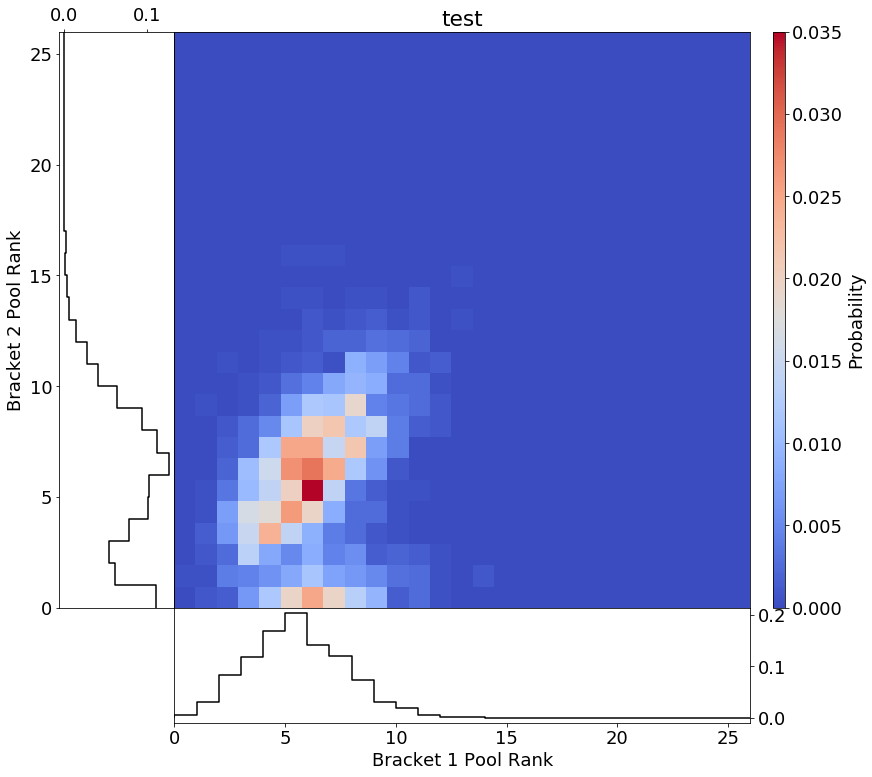

In [173]:

H=rankingArray.T
xbins=range(H.shape[0])
ybins=range(H.shape[1])

fig = plt.figure(figsize=(16, 16))

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.5, 0.5))
ax_Px = plt.axes((0.2, 0.24, 0.5, 0.1))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.5))
ax_cb = plt.axes((0.72, 0.34, 0.01, 0.5))
plt.axes(ax_Pxy)

plt.imshow(H/H.sum(), interpolation='nearest', origin='lower', aspect='auto',
           extent=[0, 2, 0, 2], cmap='coolwarm')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

cb = plt.colorbar(cax=ax_cb)
cb.set_label('Probability')
# cb.set_ticklabels(rotation=90)
# plt.text(0, 1.02, r'$\times 10^{-3}$',
#          transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins, H.sum(0)/H.sum(), '-k', drawstyle='steps')
ax_Px.tick_params(axis='both', which='both', bottom='on', top='off', labelbottom='on', 
                  right='on', labelright='on', left='off', labelleft='off')
ax_Px.set_xlabel('Bracket 1 Pool Rank')
ax_Px.set_xlim(0,len(H.sum(0))-1)
ax_Px.margins(x=0)

# draw p(y) distribution
# ax_Px.yaxis.set_ticks([0])
ax_Py.plot(H.sum(1)/H.sum(), ybins, '-k', drawstyle='steps')
# ax_Py.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
ax_Py.tick_params(axis='both', which='both', bottom='off', top='on', labeltop='on', labelbottom='off', right='off', left='on', labelleft='on')
# ax_Py.xaxis.set_ticks([0])
ax_Py.set_ylabel('Bracket 2 Pool Rank')
ax_Py.set_ylim(0,len(H.sum(1))-1)
ax_Py.margins(y=0)

plt.title('Joint Probability, Backtest '+str(year))


In [195]:
year=2014
riskValue=0.8
norm=np.array(realrank[riskValue][year]).sum()
rankingArray=np.array(realrank[riskValue][year]).sum(axis=0)/norm
H=rankingArray.T


In [206]:
1-H[:3,:].sum()

0.6885

In [205]:
1-H[:,:3].sum()

0.70450000000000002

In [204]:
1-H[3:,3:].sum()

0.53149999999999986

In [ ]:
norm=np.array(realrank[riskValue][year]).sum()
rankingArray=np.array(realrank[riskValue][year]).sum(axis=0)/norm

plt.imshow(rankingArray.T,origin='lower',cmap='coolwarm')
plt.colorbar()
plt.title('Back-testing '+str(year)+ ', risk = '+str(riskValue))
plt.xlabel('First bracket ranking')
plt.ylabel('Second bracket ranking')


# plt.savefig('backtest_heatmaps/backtest_heatmaps-'+str(year)+'-r_'+str(riskValue*10).zfill(2)+'.png')


In [182]:
for year in yearList:
    for riskValue in [0.2,0.4,0.6,0.8,1]:
        norm=np.array(realrank[riskValue][year]).sum()
        rankingArray=np.array(realrank[riskValue][year]).sum(axis=0)/norm
        H=rankingArray.T
        xbins=range(H.shape[0])
        ybins=range(H.shape[1])

        fig = plt.figure(figsize=(16, 16))

        # define axes
        ax_Pxy = plt.axes((0.2, 0.34, 0.5, 0.5))
        ax_Px = plt.axes((0.2, 0.24, 0.5, 0.1))
        ax_Py = plt.axes((0.1, 0.34, 0.1, 0.5))
        ax_cb = plt.axes((0.72, 0.34, 0.01, 0.5))
        plt.axes(ax_Pxy)

        plt.imshow(H/H.sum(), interpolation='nearest', origin='lower', aspect='auto',
                   extent=[0, 2, 0, 2], cmap='coolwarm')
        plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

        cb = plt.colorbar(cax=ax_cb)
        cb.set_label('Probability')
        # cb.set_ticklabels(rotation=90)
        # plt.text(0, 1.02, r'$\times 10^{-3}$',
        #          transform=ax_cb.transAxes)

        # draw p(x) distribution
        ax_Px.plot(xbins, H.sum(0)/H.sum(), '-k', drawstyle='steps')
        ax_Px.tick_params(axis='both', which='both', bottom='on', top='off', labelbottom='on', 
                          right='on', labelright='on', left='off', labelleft='off')
        ax_Px.set_xlabel('Bracket 1 Pool Rank')
        ax_Px.set_xlim(0,len(H.sum(0))-1)
        ax_Px.margins(x=0)

        # draw p(y) distribution
        # ax_Px.yaxis.set_ticks([0])
        ax_Py.plot(H.sum(1)/H.sum(), ybins, '-k', drawstyle='steps')
        # ax_Py.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
        ax_Py.tick_params(axis='both', which='both', bottom='off', top='on', labeltop='on', labelbottom='off', right='off', left='on', labelleft='on')
        # ax_Py.xaxis.set_ticks([0])
        ax_Py.set_ylabel('Bracket 2 Pool Rank')
        ax_Py.set_ylim(0,len(H.sum(1))-1)
        ax_Py.margins(y=0)

        plt.title('Joint Probability, Backtest '+str(year)+' Risk: '+str(riskValue))
        plt.savefig('backtest_heatmaps/backtest_heatmaps-'+str(year)+'-r_'+str(riskValue*10).zfill(2)+'.png')        
        plt.clf()

/Users/gshau/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


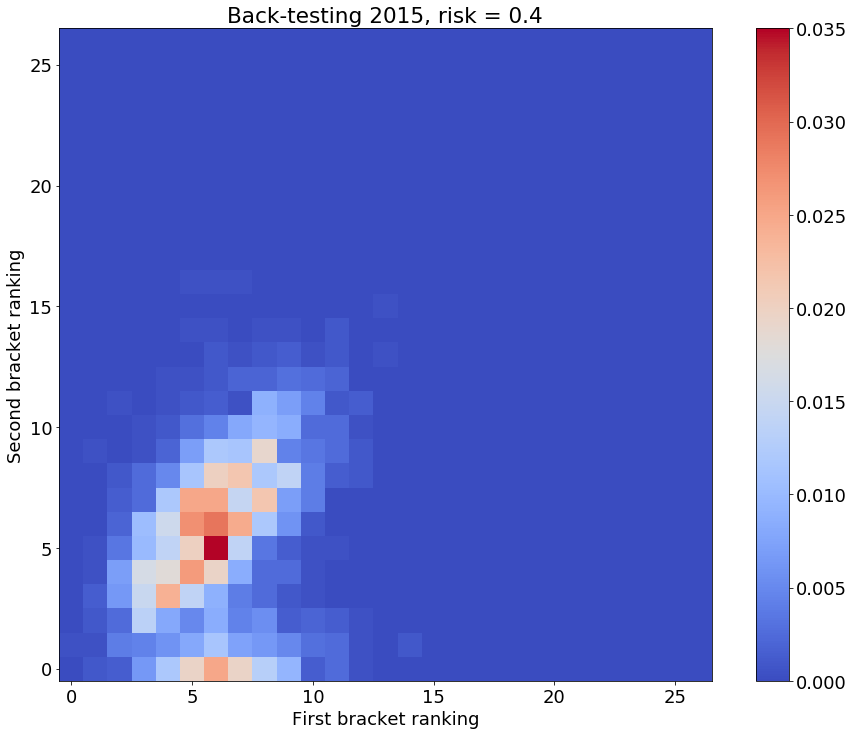

In [53]:
for year in [2015]: #yearList:
    for riskValue in [0.4]: #[0.2,0.4,0.6,0.8,1]:
        norm=np.array(realrank[riskValue][year]).sum()
        rankingArray=np.array(realrank[riskValue][year]).sum(axis=0)/norm
#         plt.figure()
        plt.imshow(rankingArray.T,origin='lower',cmap='coolwarm')
        plt.colorbar()
        plt.title('Back-testing '+str(year)+ ', risk = '+str(riskValue))
        plt.xlabel('First bracket ranking')
        plt.ylabel('Second bracket ranking')
        plt.savefig('backtest_heatmaps/backtest_heatmaps-'+str(year)+'-r_'+str(riskValue*10).zfill(2)+'.png')
#         plt.clf()

Show stability of expected payout by iteration of pool simulation

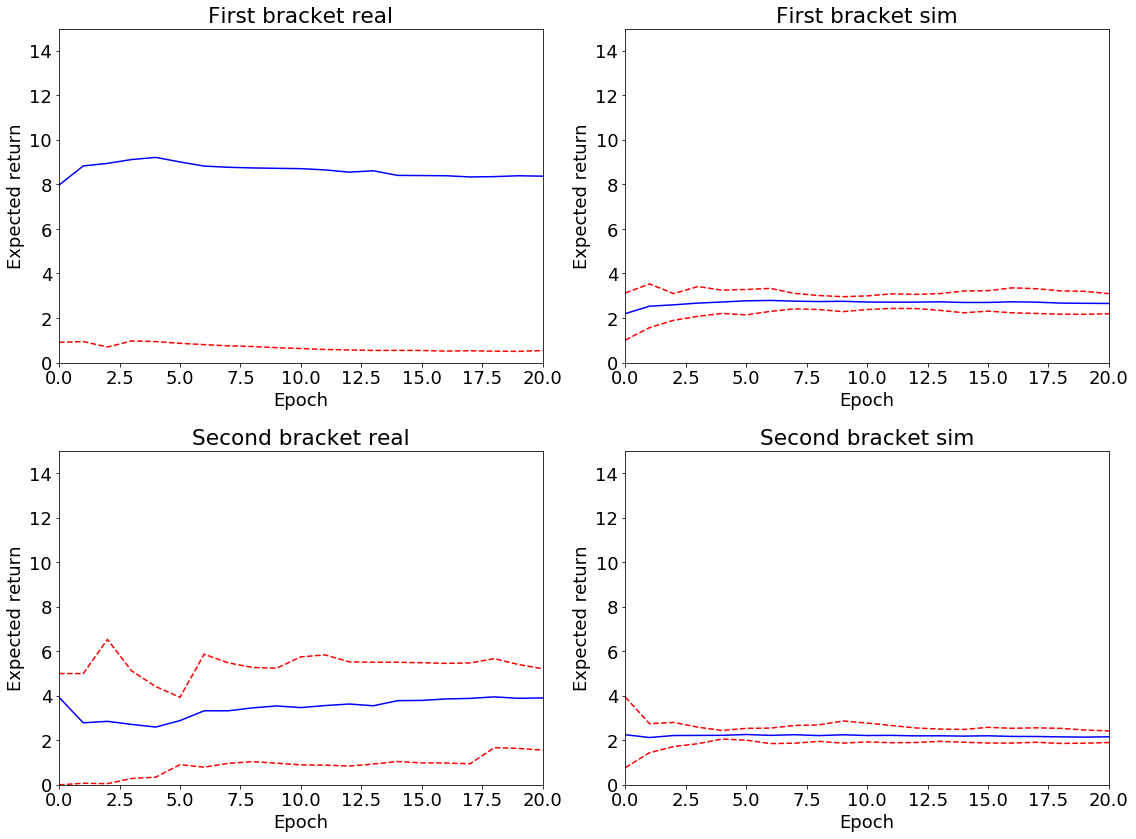

In [12]:
ymax=15
xmax=20

yearList=np.arange(2017,2003,-1)

risk=0.4

norm=(np.arange(nPools)+1)

plt.subplot(2,2,1)
dist=np.array([np.array(real[risk][year])[:,0].cumsum()/norm
                   for year in yearList])
plt.plot(dist.mean(axis=0),'b')
plt.plot(np.percentile(dist,16,axis=0),'r--')
plt.plot(np.percentile(dist,84,axis=0),'r--')
plt.ylim(0,ymax)
plt.xlim(0,xmax)
plt.title('First bracket real')
plt.ylabel('Expected return')
plt.xlabel('Epoch')

plt.subplot(2,2,2)
dist=np.array([np.array(sim[risk][year])[:,0].cumsum()/norm
                   for year in yearList])
plt.plot(dist.mean(axis=0),'b')
plt.plot(np.percentile(dist,16,axis=0),'r--')
plt.plot(np.percentile(dist,84,axis=0),'r--')
plt.ylim(0,ymax)
plt.xlim(0,xmax)
plt.title('First bracket sim')
plt.ylabel('Expected return')
plt.xlabel('Epoch')


plt.subplot(2,2,3)
dist=np.array([np.array(real[risk][year])[:,1].cumsum()/norm
                   for year in yearList])
plt.plot(dist.mean(axis=0),'b')
plt.plot(np.percentile(dist,16,axis=0),'r--')
plt.plot(np.percentile(dist,84,axis=0),'r--')
plt.ylim(0,ymax)
plt.xlim(0,xmax)
plt.title('Second bracket real')
plt.ylabel('Expected return')
plt.xlabel('Epoch')

plt.subplot(2,2,4)
dist=np.array([np.array(sim[risk][year])[:,1].cumsum()/norm
                   for year in yearList])
plt.plot(dist.mean(axis=0),'b')
plt.plot(np.percentile(dist,16,axis=0),'r--')
plt.plot(np.percentile(dist,84,axis=0),'r--')
plt.ylim(0,ymax)
plt.xlim(0,xmax)
plt.title('Second bracket sim')
plt.ylabel('Expected return')
plt.xlabel('Epoch')
plt.tight_layout()


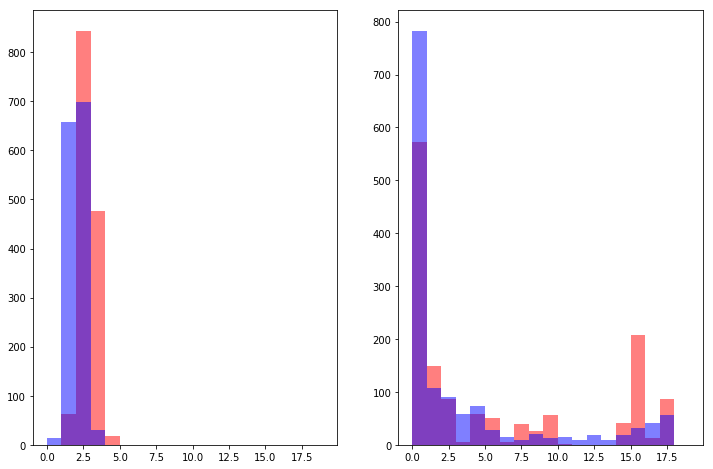

In [36]:
plt.subplot(1,2,1)
plt.hist(np.array([np.array(sim[year])[:,0] for year in np.arange(2017,2003,-1)]).flatten(),bins=range(20),color=[1,0,0,0.5]);
plt.hist(np.array([np.array(sim[year])[:,1] for year in np.arange(2017,2003,-1)]).flatten(),bins=range(20),color=[0,0,1,0.5]);
plt.subplot(1,2,2)

plt.hist(np.array([np.array(real[year])[:,0] for year in np.arange(2017,2003,-1)]).flatten(),bins=range(20),color=[1,0,0,0.5]);
plt.hist(np.array([np.array(real[year])[:,1] for year in np.arange(2017,2003,-1)]).flatten(),bins=range(20),color=[0,0,1,0.5]);